<a href="https://colab.research.google.com/github/Vaishnavirajulu21/regression_model_ml/blob/main/car_price_prediction_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
#load the dataset
data = pd.read_csv("automobile.csv")
data.head(30)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115.0,5500.0,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,15250
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,18920
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140.0,5500.0,17,20,23875
9,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.80,101.0,5800.0,23,29,16430


# Explotary Data Analysis

In [ ]:
data.isna()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
199,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [ ]:
#to check the missing values

missing_values = data.isna()
missing_values

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
199,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
for column in missing_values.columns.values.tolist():
  true_count = missing_values[column].value_counts().get(True,0)
  if true_count > 0:
    print(f"{column}: {true_count}")


normalized-losses: 37
num-of-doors: 2
bore: 4
stroke: 4
horsepower: 2
peak-rpm: 2


In [ ]:
data.dropna(axis=0,subset=["price"],inplace=True)
data.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875
9,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16430


In [ ]:
#filling the null_column with mean and mode

#filling the missing value with mean
data["normalized-losses"].fillna(data["normalized-losses"].mean(),inplace=True)
data["bore"].fillna(data["bore"].mean(),inplace=True)
data["stroke"].fillna(data["stroke"].mean(),inplace=True)
data["horsepower"].fillna(data["horsepower"].mean(),inplace=True)
data['peak-rpm'].fillna(data['peak-rpm'].mean(), inplace=True)

#filling the missing value with mode
data["num-of-doors"].fillna(data["num-of-doors"].mode()[0],inplace=True)

print(data.isnull().sum())


symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


/tmp/ipython-input-553538904.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["normalized-losses"].fillna(data["normalized-losses"].mean(),inplace=True)
/tmp/ipython-input-553538904.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(

In [ ]:
data.to_csv("auto.csv")

In [ ]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365602,478.113178,6.423220,6.815150,7947.066342
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5117.587940,24.000000,30.000000,10295.000000
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

# data pre-processing


In [ ]:
data.dtypes


,0
symboling,int64
normalized-losses,float64
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


In [ ]:
# Get the data types of all columns
dtypes = data.dtypes

# Filter for columns with object dtype
object_cols = dtypes[dtypes == 'object']

# Print the object columns
print(object_cols)

make                object
fuel-type           object
aspiration          object
num-of-doors        object
body-style          object
drive-wheels        object
engine-location     object
engine-type         object
num-of-cylinders    object
fuel-system         object
dtype: object


In [ ]:
x=data.drop(columns='price')#input
y=data["price"] #output

# Identify categorical columns
categorical_cols = x.select_dtypes(include=['object']).columns

# Apply one-hot encoding
x = pd.get_dummies(x, columns=categorical_cols, drop_first=True)

print(x)
print(y)

     symboling  normalized-losses  wheel-base  length  width  height  \
0            3              122.0        88.6   168.8   64.1    48.8   
1            3              122.0        88.6   168.8   64.1    48.8   
2            1              122.0        94.5   171.2   65.5    52.4   
3            2              164.0        99.8   176.6   66.2    54.3   
4            2              164.0        99.4   176.6   66.4    54.3   
..         ...                ...         ...     ...    ...     ...   
196         -1               95.0       109.1   188.8   68.9    55.5   
197         -1               95.0       109.1   188.8   68.8    55.5   
198         -1               95.0       109.1   188.8   68.9    55.5   
199         -1               95.0       109.1   188.8   68.9    55.5   
200         -1               95.0       109.1   188.8   68.9    55.5   

     curb-weight  engine-size  bore  stroke  ...  num-of-cylinders_three  \
0           2548          130  3.47    2.68  ...           

# spliting the data

In [ ]:
#x_train -- 80% input
#y_train -- 80%  output
#x_test   -- 20% input
#y_test -- 20% output

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("dataset:",data)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


dataset:      symboling  normalized-losses         make fuel-type aspiration  \
0            3              122.0  alfa-romero       gas        std   
1            3              122.0  alfa-romero       gas        std   
2            1              122.0  alfa-romero       gas        std   
3            2              164.0         audi       gas        std   
4            2              164.0         audi       gas        std   
..         ...                ...          ...       ...        ...   
196         -1               95.0        volvo       gas        std   
197         -1               95.0        volvo       gas      turbo   
198         -1               95.0        volvo       gas        std   
199         -1               95.0        volvo    diesel      turbo   
200         -1               95.0        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front 

#model training


In [ ]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

# Model Evaluation

In [ ]:
y_pred = lr.predict(X_test)

print("y_pred:",y_pred)
print("y_test:",y_test)

y_pred: [ 7339.94043992 28023.53701143  6611.33223151  7450.79333983
 12953.65734873  5544.72860198 43449.76324173  9663.47038
 16380.91655716 32338.08016868 25088.0876755  10372.16768734
 10591.04177898  8136.78804699 12278.88888008  8325.23443658
 10131.37035145  7195.20800109  9046.93692753 42354.52653301
 32528.         31200.02811934  6783.43375787  6986.52996318
 25919.95992307 10229.67363365 11013.7440289  27864.90874416
 35666.35200989 15359.80531339 18247.55859022  5653.98827725
 19339.81770368  6761.90555833  5081.85372102 13783.34539231
  6483.19234165  8116.30395721 10961.74729514  8662.53988018
 12859.10862801]
y_test: 95      8249
15     41315
30      6855
158     9258
128    11850
115     5572
69     35056
171     9988
175    15998
45     35550
66     28176
183     9495
165     9989
78      8499
187    13295
178     7775
56      8845
152     6938
82      6989
68     34184
124    34028
16     36880
148     6488
93      7499
65     28248
60     10795
84      9279
67     31

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Calculate and print evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 2036.5460690960356
Mean Squared Error (MSE): 10927152.438856633
R-squared (R2): 0.9106870400948667


In [ ]:
from sklearn.model_selection import cross_val_score


cv_scores = cross_val_score(lr, x, y, cv=5, scoring='r2')

# Print the cross-validation scores and their mean
print("Cross-validation R-squared scores:", cv_scores)
print("Mean cross-validation R-squared score:", cv_scores.mean())

Cross-validation R-squared scores: [ 0.51098015  0.83321536 -0.45708965  0.24983279 -0.60794331]
Mean cross-validation R-squared score: 0.1057990678414221


# model prediction


In [ ]:
y_pred = lr.predict(X_test)

print("y_pred:",y_pred)



y_pred: [ 7339.94043992 28023.53701143  6611.33223151  7450.79333983
 12953.65734873  5544.72860198 43449.76324173  9663.47038
 16380.91655716 32338.08016868 25088.0876755  10372.16768734
 10591.04177898  8136.78804699 12278.88888008  8325.23443658
 10131.37035145  7195.20800109  9046.93692753 42354.52653301
 32528.         31200.02811934  6783.43375787  6986.52996318
 25919.95992307 10229.67363365 11013.7440289  27864.90874416
 35666.35200989 15359.80531339 18247.55859022  5653.98827725
 19339.81770368  6761.90555833  5081.85372102 13783.34539231
  6483.19234165  8116.30395721 10961.74729514  8662.53988018
 12859.10862801]


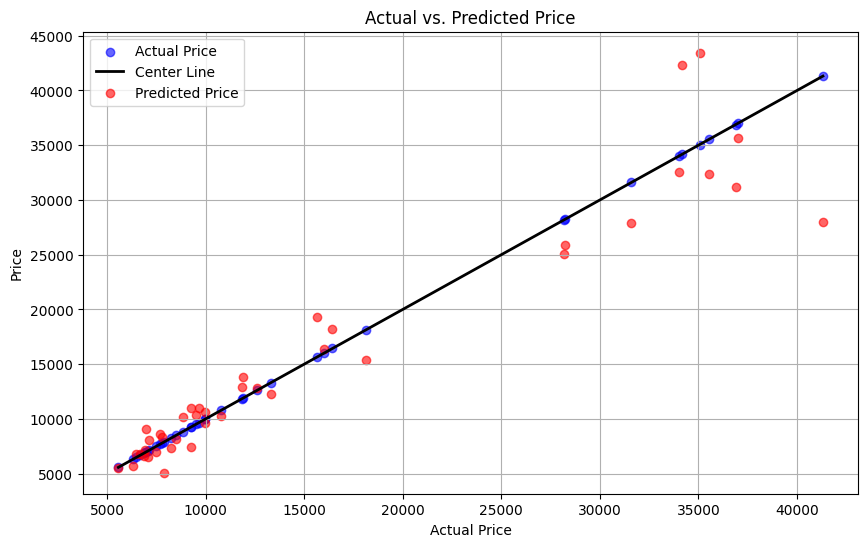

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Plot actual vs. actual (diagonal line)
plt.scatter(y_test, y_test, color='blue', label='Actual Price', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='-', label='Center Line',linewidth=2)

# Plot actual vs. predicted
plt.scatter(y_test, y_pred, color='red', label='Predicted Price', alpha=0.6)

plt.xlabel("Actual Price")
plt.ylabel("Price") # Changed ylabel to just 'Price' for clarity
plt.title("Actual vs. Predicted Price")
plt.legend()
plt.grid(True)

plt.show()

`

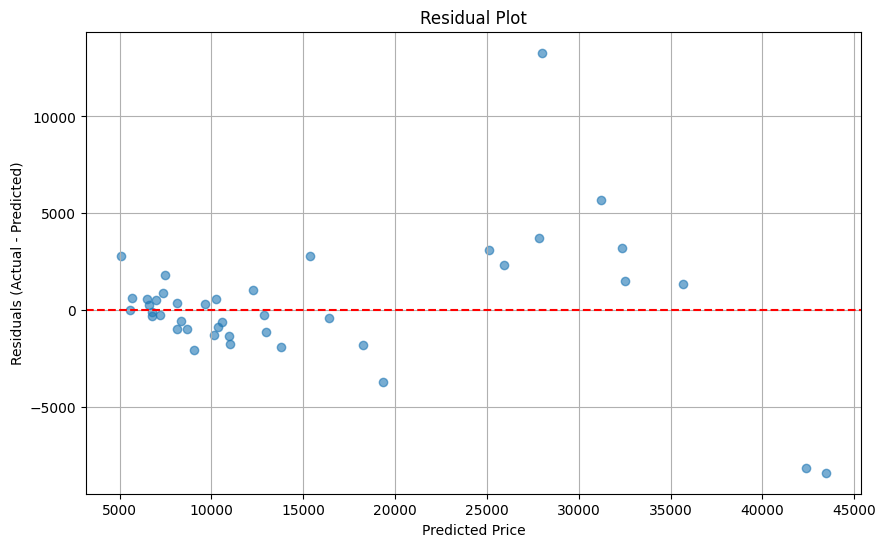

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--') # Add a horizontal line at y=0
plt.xlabel("Predicted Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.grid(True)
plt.show()

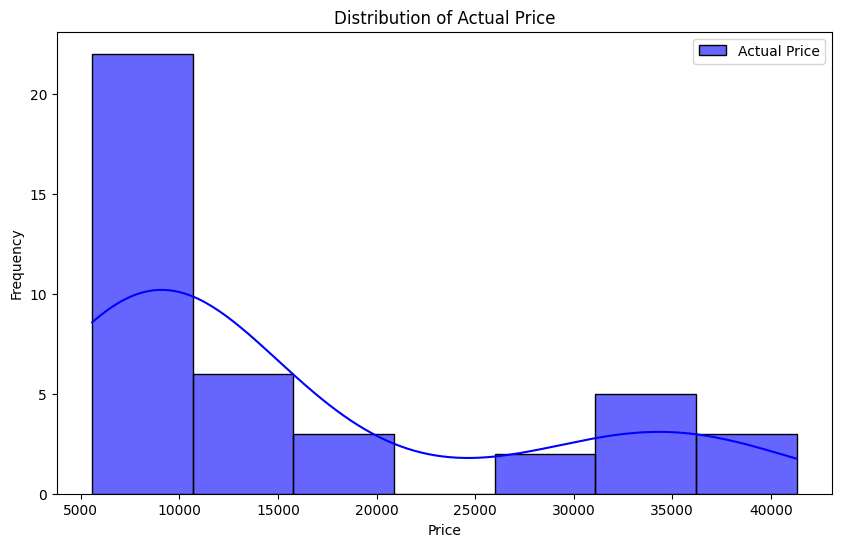

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# plot for the ditribution of y_test

plt.figure(figsize=(10,6))
sns.histplot(y_test,kde=True,color='blue',label='Actual Price',alpha=0.6)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Actual Price")
plt.legend()
plt.show()

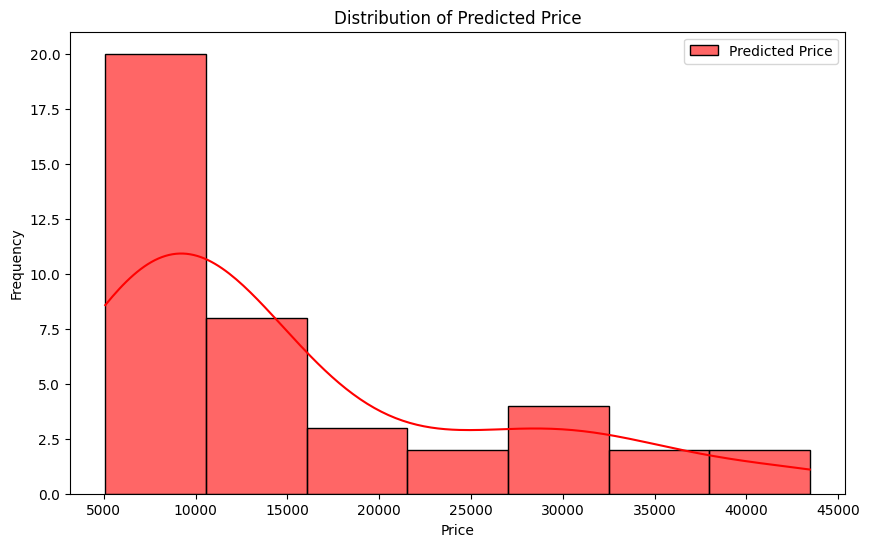

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(y_pred,kde=True,color='red',label='Predicted Price',alpha=0.6)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Price")
plt.legend()
plt.show()

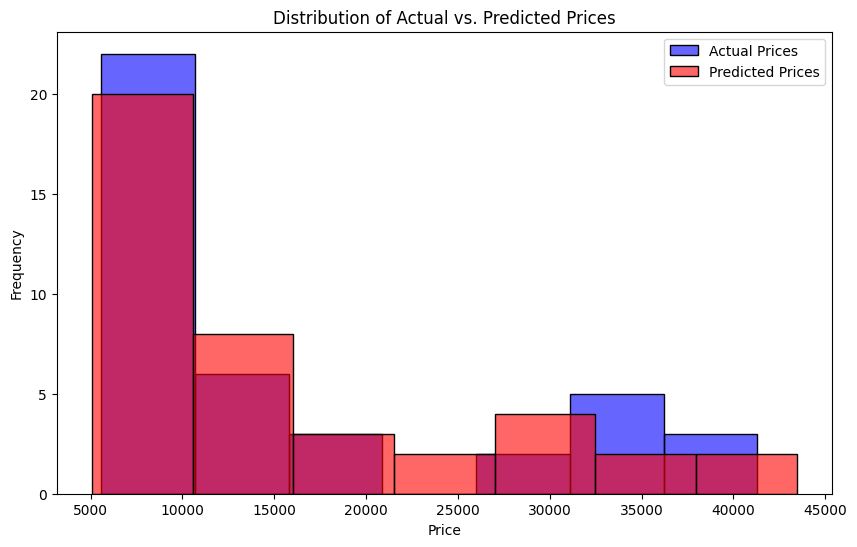

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distributions of y_test and y_pred for comparison
plt.figure(figsize=(10, 6))
sns.histplot(y_test, kde=False, color='blue', label='Actual Prices', alpha=0.6)
sns.histplot(y_pred, kde=False, color='red', label='Predicted Prices', alpha=0.6)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Actual vs. Predicted Prices")
plt.legend()
plt.show()

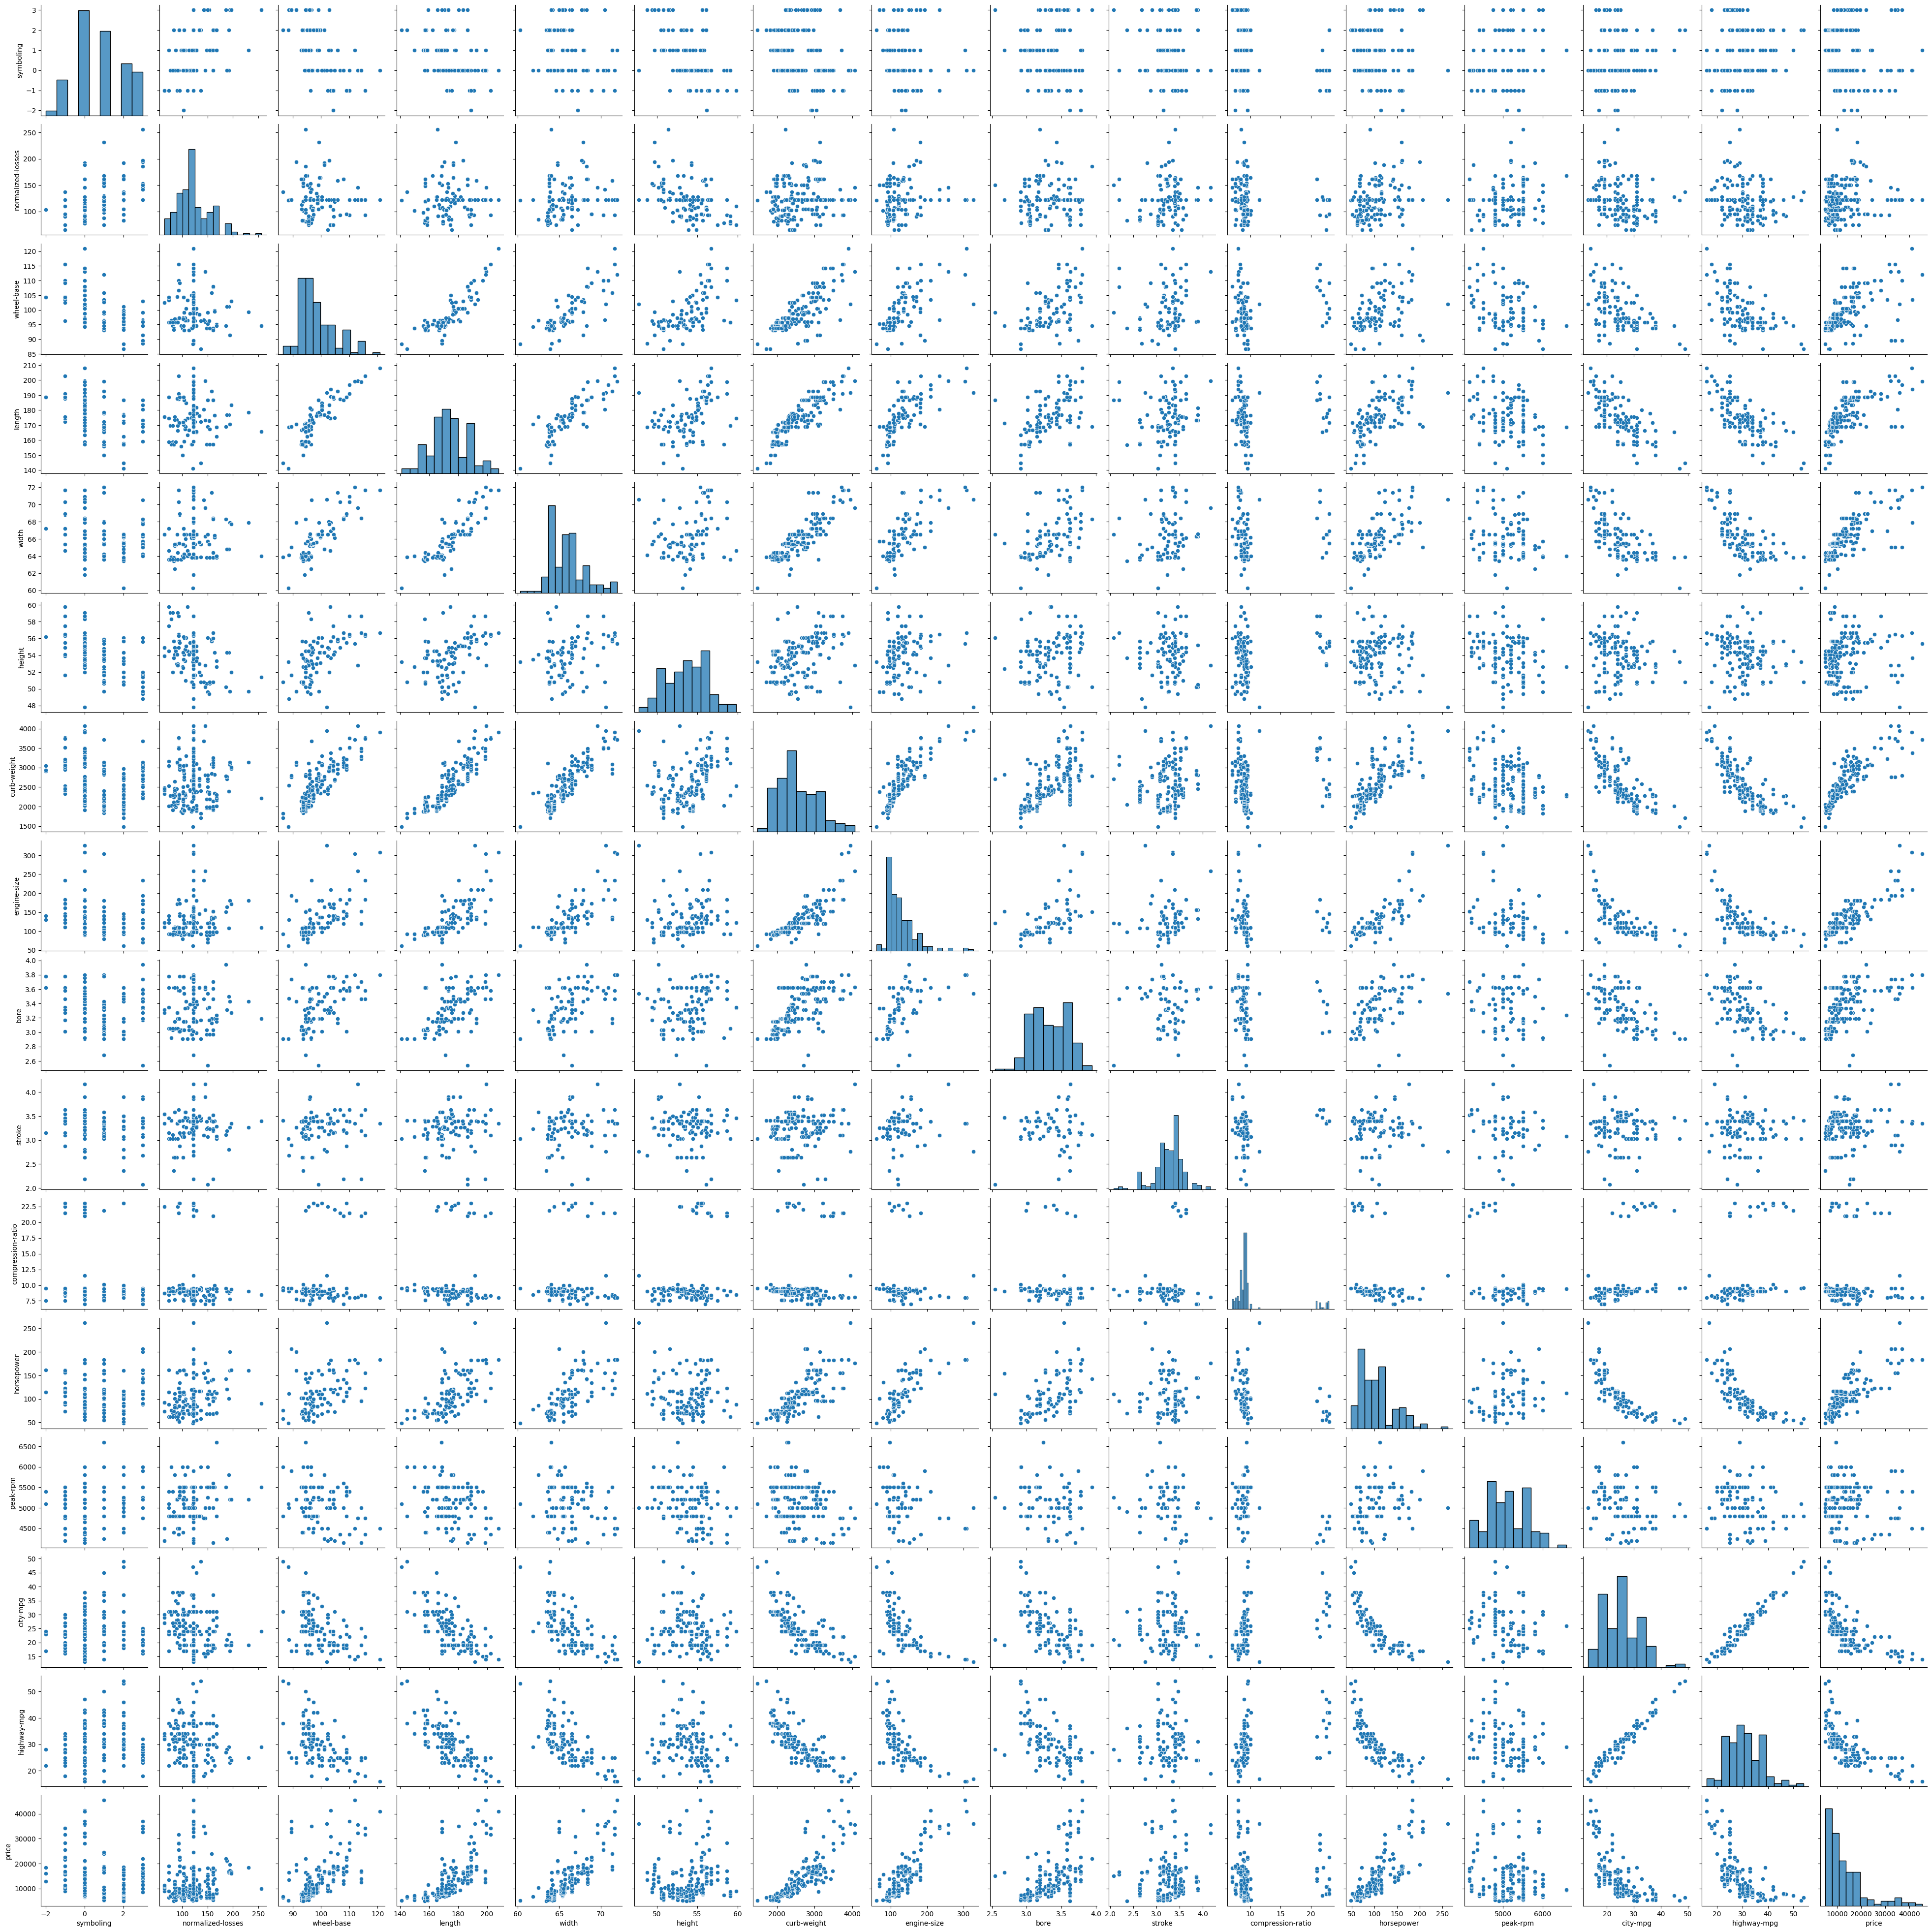

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data)
plt.show()